In [1]:
# import re
import csv
import sqlite3
import functions
import pandas as pd
import requests as rq
from config import api_key
from textblob import TextBlob
# pip install geopy
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
#import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers
import pickle

In [2]:
df = pd.read_csv('Resources/airlines_reviews.csv')
df.head(2)

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no


In [3]:
df = functions.column_work(df)

In [4]:
functions.split_to_via(df)

,Title,Airline,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Year Flown,Origin,Destination,Via
0,Flight was amazing,Singapore Airlines,Flight was amazing. The crew onboard this fl...,Solo Leisure,12,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes,2023,Jakarta,Singapore,None
1,seats on this aircraft are dreadful,Singapore Airlines,Booking an emergency exit seat still meant h...,Solo Leisure,2,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no,2024,Phuket,Singapore,None
2,Food was plentiful and tasty,Singapore Airlines,Excellent performance on all fronts. I would...,Family Leisure,2,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes,2024,Siem Reap,Singapore,None
3,“how much food was available,Singapore Airlines,Pretty comfortable flight considering I was f...,Solo Leisure,2,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes,2024,Singapore,London Heathrow,None
4,“service was consistently good”,Singapore Airlines,The service was consistently good from start ...,Family Leisure,2,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes,2024,Singapore,Phnom Penh,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,an uneventful flight,Korean Air,"KE124, Brisbane to Incheon (A330) and KE867,...",Business,6,BNE to ULN via ICN,Economy Class,5,4,5,3,4,7,yes,2016,BNE,ULN,ICN
8096,Korean Air always impresses,Korean Air,Our recent flight was our fourth trip to the...,Couple Leisure,6,SYD to LHR via ICN,Economy Class,3,5,5,4,5,10,yes,2016,SYD,LHR,ICN
8097,didn’t offer anything,Korean Air,I flew Korean Air from Bali to Seoul in Pres...,Business,4,DPS to ICN,Business Class,4,5,5,5,1,2,no,2016,DPS,ICN,None
8098,appreciated the service onboard,Korean Air,Seoul to Paris with Korean Air. I am traveli...,Business,4,ICN to CDG,Business Class,5,1,3,4,5,10,yes,2016,ICN,CDG,None


In [5]:
df_subset = df[['Origin', 'Destination', 'Via']]
df_subset

,Origin,Destination,Via
0,Jakarta,Singapore,None
1,Phuket,Singapore,None
2,Siem Reap,Singapore,None
3,Singapore,London Heathrow,None
4,Singapore,Phnom Penh,None
...,...,...,...
8095,BNE,ULN,ICN
8096,SYD,LHR,ICN
8097,DPS,ICN,None
8098,ICN,CDG,None


In [6]:
print(f'Rows and Columns: {df.shape}')
df.columns

Rows and Columns: (8100, 18)


Index(['Title', 'Airline', 'Reviews', 'Type of Traveller', 'Month Flown',
       'Route', 'Class', 'Seat Comfort', 'Staff Service', 'Food & Beverages',
       'Inflight Entertainment', 'Value For Money', 'Overall Rating',
       'Recommended', 'Year Flown', 'Origin', 'Destination', 'Via'],
      dtype='object')

In [7]:
functions.blob_function(df)

,Title,Airline,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,...,Overall Rating,Recommended,Year Flown,Origin,Destination,Via,Comment Polarity,Comment Subjectivity,Title Polarity,Title Subjectivity
0,Flight was amazing,Singapore Airlines,Flight was amazing. The crew onboard this fl...,Solo Leisure,12,Jakarta to Singapore,Business Class,4,4,4,...,9,yes,2023,Jakarta,Singapore,None,0.384667,0.560000,0.600,0.9
1,seats on this aircraft are dreadful,Singapore Airlines,Booking an emergency exit seat still meant h...,Solo Leisure,2,Phuket to Singapore,Economy Class,5,3,4,...,3,no,2024,Phuket,Singapore,None,-0.212500,0.662500,-1.000,1.0
2,Food was plentiful and tasty,Singapore Airlines,Excellent performance on all fronts. I would...,Family Leisure,2,Siem Reap to Singapore,Economy Class,1,5,2,...,10,yes,2024,Siem Reap,Singapore,None,0.500000,0.750000,0.000,0.0
3,“how much food was available,Singapore Airlines,Pretty comfortable flight considering I was f...,Solo Leisure,2,Singapore to London Heathrow,Economy Class,5,5,5,...,10,yes,2024,Singapore,London Heathrow,None,0.325496,0.565488,0.300,0.3
4,“service was consistently good”,Singapore Airlines,The service was consistently good from start ...,Family Leisure,2,Singapore to Phnom Penh,Economy Class,5,5,5,...,10,yes,2024,Singapore,Phnom Penh,None,0.412500,0.537500,0.700,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,an uneventful flight,Korean Air,"KE124, Brisbane to Incheon (A330) and KE867,...",Business,6,BNE to ULN via ICN,Economy Class,5,4,5,...,7,yes,2016,BNE,ULN,ICN,0.166667,0.425000,0.000,0.0
8096,Korean Air always impresses,Korean Air,Our recent flight was our fourth trip to the...,Couple Leisure,6,SYD to LHR via ICN,Economy Class,3,5,5,...,10,yes,2016,SYD,LHR,ICN,0.334855,0.512734,0.000,0.0
8097,didn’t offer anything,Korean Air,I flew Korean Air from Bali to Seoul in Pres...,Business,4,DPS to ICN,Business Class,4,5,5,...,2,no,2016,DPS,ICN,None,-0.074621,0.474621,0.000,0.0
8098,appreciated the service onboard,Korean Air,Seoul to Paris with Korean Air. I am traveli...,Business,4,ICN to CDG,Business Class,5,1,3,...,10,yes,2016,ICN,CDG,None,0.276286,0.542524,0.200,0.1


In [8]:
print(f'Rows and Columns: {df.shape}')
df.columns

Rows and Columns: (8100, 22)


Index(['Title', 'Airline', 'Reviews', 'Type of Traveller', 'Month Flown',
       'Route', 'Class', 'Seat Comfort', 'Staff Service', 'Food & Beverages',
       'Inflight Entertainment', 'Value For Money', 'Overall Rating',
       'Recommended', 'Year Flown', 'Origin', 'Destination', 'Via',
       'Comment Polarity', 'Comment Subjectivity', 'Title Polarity',
       'Title Subjectivity'],
      dtype='object')

In [9]:
airport_codes = pd.read_csv('Resources/airports_utf.csv')

In [10]:
unique_origins = df['Origin'].unique()
airports_origins = airport_codes['City'].tolist() + airport_codes['Code'].tolist()
origins_values_not_found = [origin for origin in unique_origins if origin not in airports_origins]

print("Values from the 'Origin' column not found in airports_utf.csv 'City' or 'Code' columns:")
print(origins_values_not_found)

Values from the 'Origin' column not found in airports_utf.csv 'City' or 'Code' columns:
['Zürich', 'München', 'Spain', 'Düsseldorf', 'Mahé', 'São Paulo', 'Hyderabad', 'Mahé, Seychelles', 'USA', 'United States', 'Adélaïde', 'Mexico', 'Santiago', 'Malé', 'Panama', 'İstanbul', 'China', 'New Yok', 'Canada', 'Malaysia', 'India', 'Panama City', 'İzmir', 'Turkey', 'Chișinău', 'Istanbul Atatürk', 'Yaoundé', 'Was', 'IA', 'París CDG', 'New U=York', 'Montréal', 'San José', 'Bogotá', 'Cancún', 'Geneva and Paris CDG']


In [11]:
values_to_exclude_origin = ['Zürich', 'München', 'Spain', 'Düsseldorf', 'Mahé', 'São Paulo', 'Hyderabad',
                            'Mahé, Seychelles', 'USA', 'United States', 'Adélaïde', 'Mexico', 'Santiago',
                            'Malé', 'Panama', 'İstanbul', 'China', 'New Yok', 'Canada', 'Malaysia', 'India',
                            'Panama City', 'İzmir', 'Turkey', 'Chișinău', 'Istanbul Atatürk', 'Yaoundé', 'Was',
                            'IA', 'París CDG', 'New U=York', 'Montréal', 'San José', 'Bogotá', 'Cancún',
                            'Geneva and Paris CDG']

# Keep only rows where 'Origin' column values are not in the list of values to exclude
df = df[~df['Origin'].isin(values_to_exclude_origin)]

In [12]:
print(f'Rows and Columns: {df.shape}')
df.columns

Rows and Columns: (8025, 22)


Index(['Title', 'Airline', 'Reviews', 'Type of Traveller', 'Month Flown',
       'Route', 'Class', 'Seat Comfort', 'Staff Service', 'Food & Beverages',
       'Inflight Entertainment', 'Value For Money', 'Overall Rating',
       'Recommended', 'Year Flown', 'Origin', 'Destination', 'Via',
       'Comment Polarity', 'Comment Subjectivity', 'Title Polarity',
       'Title Subjectivity'],
      dtype='object')

In [13]:
unique_destinations = df['Destination'].unique()
airports_destinations = airport_codes['City'].tolist() + airport_codes['Code'].tolist()
destinations_values_not_found = [destination for destination in unique_destinations if destination not in airports_destinations]

print("Values from the 'Destination' column not found in airports_utf.csv 'City' or 'Code' columns:")
print(destinations_values_not_found)

Values from the 'Destination' column not found in airports_utf.csv 'City' or 'Code' columns:
['', 'Zürich', 'São Paulo', 'Hyderabad', 'Lahore VIA \\DOHA', 'Japan', 'Malé', 'Hydrabad', 'Düsseldorf', 'Arla', 'İstanbul', 'Panama City', 'İstanbu', 'Panama', 'Panamá', 'Málaga', 'New York City', 'Panamá City', 'Pointe-à-Pitre', 'Montréal', 'Hing Kong', 'Los  Angeles', 'new York', 'Auckland and return', 'Hong kong', 'Taiwan', 'Korea', '- New York']


In [14]:
values_to_exclude_destination = ['', 'Zürich', 'São Paulo', 'Hyderabad', 'Lahore VIA \\DOHA', 'Japan',
                                 'Malé', 'Hydrabad', 'Düsseldorf', 'Arla', 'İstanbul', 'Panama City',
                                 'İstanbu', 'Panama', 'Panamá', 'Málaga', 'New York City', 'Panamá City',
                                 'Pointe-à-Pitre', 'Montréal', 'Hing Kong', 'Los  Angeles', 'new York',
                                 'Auckland and return', 'Hong kong', 'Taiwan', 'Korea', '- New York']

# Keep only rows where 'Destination' column values are not in the list of values to exclude
df = df[~df['Destination'].isin(values_to_exclude_destination)]

In [15]:
print(f'Rows and Columns: {df.shape}')
df.columns

Rows and Columns: (7959, 22)


Index(['Title', 'Airline', 'Reviews', 'Type of Traveller', 'Month Flown',
       'Route', 'Class', 'Seat Comfort', 'Staff Service', 'Food & Beverages',
       'Inflight Entertainment', 'Value For Money', 'Overall Rating',
       'Recommended', 'Year Flown', 'Origin', 'Destination', 'Via',
       'Comment Polarity', 'Comment Subjectivity', 'Title Polarity',
       'Title Subjectivity'],
      dtype='object')

In [16]:
unique_via = df['Via'].unique()
airports_via = airport_codes['City'].tolist() + airport_codes['Code'].tolist()
via_values_not_found = [via for via in unique_via if via not in airports_via]

print("Values from the 'Via' column not found in airports_utf.csv 'City' or 'Code' columns:")
print(via_values_not_found)

Values from the 'Via' column not found in airports_utf.csv 'City' or 'Code' columns:
[None, 'Hong', 'New', 'DOA', 'Lagoa', 'DXBMLE', 'Los', 'Kuala', 'Минск', 'San', 'São', 'Panama', nan, 'İstanbul', 'Sao', 'paris', 'Italy', 'Washington,', 'Lyons', 'Hongkong', 'Ho', 'Degeau', 'INC']


In [17]:
values_to_exclude_via = ['Hong', 'New', 'DOA', 'Lagoa', 'DXBMLE', 'Los', 'Kuala', 'Минск', 'San', 'São',
                         'Panama', 'İstanbul', 'Sao', 'paris', 'Italy', 'Washington,', 'Lyons', 'Hongkong',
                         'Ho', 'Degeau', 'INC']

# Keep only rows where 'Via' column values are not in the list of values to exclude
df = df[~df['Via'].isin(values_to_exclude_via)]

In [18]:
print(f'Rows and Columns: {df.shape}')
df.columns

Rows and Columns: (7683, 22)


Index(['Title', 'Airline', 'Reviews', 'Type of Traveller', 'Month Flown',
       'Route', 'Class', 'Seat Comfort', 'Staff Service', 'Food & Beverages',
       'Inflight Entertainment', 'Value For Money', 'Overall Rating',
       'Recommended', 'Year Flown', 'Origin', 'Destination', 'Via',
       'Comment Polarity', 'Comment Subjectivity', 'Title Polarity',
       'Title Subjectivity'],
      dtype='object')

In [19]:
df['Via'].value_counts()

Via
Doha         947
Istanbul     849
Dubai        613
Paris        272
Singapore    261
            ... 
Dhaka          1
Seattle        1
Oslo           1
Harare         1
SYD            1
Name: count, Length: 118, dtype: int64

In [20]:
df['Origin']

0         Jakarta
1          Phuket
2       Siem Reap
3       Singapore
4       Singapore
          ...    
8095          BNE
8096          SYD
8097          DPS
8098          ICN
8099          ICN
Name: Origin, Length: 7683, dtype: object

In [21]:
from functions import find_airport_code

In [22]:
df['Origin_Code'] = df['Origin'].apply(lambda x: find_airport_code(x, airport_codes))
df['Destination_Code'] = df['Destination'].apply(lambda x: find_airport_code(x, airport_codes))
df['Via_Code'] = df['Via'].apply(lambda x: find_airport_code(x, airport_codes))

In [23]:
df.columns

Index(['Title', 'Airline', 'Reviews', 'Type of Traveller', 'Month Flown',
       'Route', 'Class', 'Seat Comfort', 'Staff Service', 'Food & Beverages',
       'Inflight Entertainment', 'Value For Money', 'Overall Rating',
       'Recommended', 'Year Flown', 'Origin', 'Destination', 'Via',
       'Comment Polarity', 'Comment Subjectivity', 'Title Polarity',
       'Title Subjectivity', 'Origin_Code', 'Destination_Code', 'Via_Code'],
      dtype='object')

In [24]:
df['Origin_Code']

0       CGK
1       HKT
2       SAI
3       SIN
4       SIN
       ... 
8095    BNE
8096    SYD
8097    DPS
8098    ICN
8099    ICN
Name: Origin_Code, Length: 7683, dtype: object

In [25]:
df['Destination_Code']

0       SIN
1       SIN
2       SIN
3       LHR
4       PNH
       ... 
8095    ULN
8096    LHR
8097    ICN
8098    CDG
8099    YYZ
Name: Destination_Code, Length: 7683, dtype: object

In [26]:
df['Via_Code']

0       None
1       None
2       None
3       None
4       None
        ... 
8095     ICN
8096     ICN
8097    None
8098    None
8099    None
Name: Via_Code, Length: 7683, dtype: object

In [27]:
from functions import find_airport_city

In [28]:
df['Origin_City'] = df['Origin'].apply(lambda x: find_airport_city(x, airport_codes))
df['Destination_City'] = df['Destination'].apply(lambda x: find_airport_city(x, airport_codes))
df['Via_City'] = df['Via'].apply(lambda x: find_airport_city(x, airport_codes))
  

In [29]:
print(f'Rows and Columns: {df.shape}')
df.columns

Rows and Columns: (7683, 28)


Index(['Title', 'Airline', 'Reviews', 'Type of Traveller', 'Month Flown',
       'Route', 'Class', 'Seat Comfort', 'Staff Service', 'Food & Beverages',
       'Inflight Entertainment', 'Value For Money', 'Overall Rating',
       'Recommended', 'Year Flown', 'Origin', 'Destination', 'Via',
       'Comment Polarity', 'Comment Subjectivity', 'Title Polarity',
       'Title Subjectivity', 'Origin_Code', 'Destination_Code', 'Via_Code',
       'Origin_City', 'Destination_City', 'Via_City'],
      dtype='object')

In [30]:
df['Origin_City']

0            Jakarta - Soekarno-Hatta
1                              Phuket
2                           Siem Reap
3                  Singapore - Changi
4                  Singapore - Changi
                    ...              
8095                         Brisbane
8096         Sydney - Kingsford Smith
8097                    Denpasar/Bali
8098    Seoul - Incheon Int'l Airport
8099    Seoul - Incheon Int'l Airport
Name: Origin_City, Length: 7683, dtype: object

In [31]:
df['Destination_City']

0                  Singapore - Changi
1                  Singapore - Changi
2                  Singapore - Changi
3                   London - Heathrow
4             Phnom Penh - Pochentong
                    ...              
8095        Ulaanbaatar - Buyant Uhaa
8096                London - Heathrow
8097    Seoul - Incheon Int'l Airport
8098        Paris - Charles de Gaulle
8099      Toronto - Lester B. Pearson
Name: Destination_City, Length: 7683, dtype: object

In [32]:
df['Via_City']

0                                None
1                                None
2                                None
3                                None
4                                None
                    ...              
8095    Seoul - Incheon Int'l Airport
8096    Seoul - Incheon Int'l Airport
8097                             None
8098                             None
8099                             None
Name: Via_City, Length: 7683, dtype: object

In [33]:
df.head()

,Title,Airline,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,...,Comment Polarity,Comment Subjectivity,Title Polarity,Title Subjectivity,Origin_Code,Destination_Code,Via_Code,Origin_City,Destination_City,Via_City
0,Flight was amazing,Singapore Airlines,Flight was amazing. The crew onboard this fl...,Solo Leisure,12,Jakarta to Singapore,Business Class,4,4,4,...,0.384667,0.560000,0.6,0.9,CGK,SIN,None,Jakarta - Soekarno-Hatta,Singapore - Changi,None
1,seats on this aircraft are dreadful,Singapore Airlines,Booking an emergency exit seat still meant h...,Solo Leisure,2,Phuket to Singapore,Economy Class,5,3,4,...,-0.212500,0.662500,-1.0,1.0,HKT,SIN,None,Phuket,Singapore - Changi,None
2,Food was plentiful and tasty,Singapore Airlines,Excellent performance on all fronts. I would...,Family Leisure,2,Siem Reap to Singapore,Economy Class,1,5,2,...,0.500000,0.750000,0.0,0.0,SAI,SIN,None,Siem Reap,Singapore - Changi,None
3,“how much food was available,Singapore Airlines,Pretty comfortable flight considering I was f...,Solo Leisure,2,Singapore to London Heathrow,Economy Class,5,5,5,...,0.325496,0.565488,0.3,0.3,SIN,LHR,None,Singapore - Changi,London - Heathrow,None
4,“service was consistently good”,Singapore Airlines,The service was consistently good from start ...,Family Leisure,2,Singapore to Phnom Penh,Economy Class,5,5,5,...,0.412500,0.537500,0.7,0.6,SIN,PNH,None,Singapore - Changi,Phnom Penh - Pochentong,None


In [34]:
from functions import one_hot_e

In [35]:
df = one_hot_e(df)
df.head()

,Title,Airline,Reviews,Month Flown,Route,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,...,Destination_City,Via_City,Class_Business Class,Class_Economy Class,Class_First Class,Class_Premium Economy,Type of Traveller_Business,Type of Traveller_Couple Leisure,Type of Traveller_Family Leisure,Type of Traveller_Solo Leisure
0,Flight was amazing,Singapore Airlines,Flight was amazing. The crew onboard this fl...,12,Jakarta to Singapore,4,4,4,4,4,...,Singapore - Changi,None,True,False,False,False,False,False,False,True
1,seats on this aircraft are dreadful,Singapore Airlines,Booking an emergency exit seat still meant h...,2,Phuket to Singapore,5,3,4,4,1,...,Singapore - Changi,None,False,True,False,False,False,False,False,True
2,Food was plentiful and tasty,Singapore Airlines,Excellent performance on all fronts. I would...,2,Siem Reap to Singapore,1,5,2,1,5,...,Singapore - Changi,None,False,True,False,False,False,False,True,False
3,“how much food was available,Singapore Airlines,Pretty comfortable flight considering I was f...,2,Singapore to London Heathrow,5,5,5,5,5,...,London - Heathrow,None,False,True,False,False,False,False,False,True
4,“service was consistently good”,Singapore Airlines,The service was consistently good from start ...,2,Singapore to Phnom Penh,5,5,5,5,5,...,Phnom Penh - Pochentong,None,False,True,False,False,False,False,True,False


In [36]:
print(f'Rows and Columns: {df.shape}')
df.columns

Rows and Columns: (7683, 34)


Index(['Title', 'Airline', 'Reviews', 'Month Flown', 'Route', 'Seat Comfort',
       'Staff Service', 'Food & Beverages', 'Inflight Entertainment',
       'Value For Money', 'Overall Rating', 'Recommended', 'Year Flown',
       'Origin', 'Destination', 'Via', 'Comment Polarity',
       'Comment Subjectivity', 'Title Polarity', 'Title Subjectivity',
       'Origin_Code', 'Destination_Code', 'Via_Code', 'Origin_City',
       'Destination_City', 'Via_City', 'Class_Business Class',
       'Class_Economy Class', 'Class_First Class', 'Class_Premium Economy',
       'Type of Traveller_Business', 'Type of Traveller_Couple Leisure',
       'Type of Traveller_Family Leisure', 'Type of Traveller_Solo Leisure'],
      dtype='object')

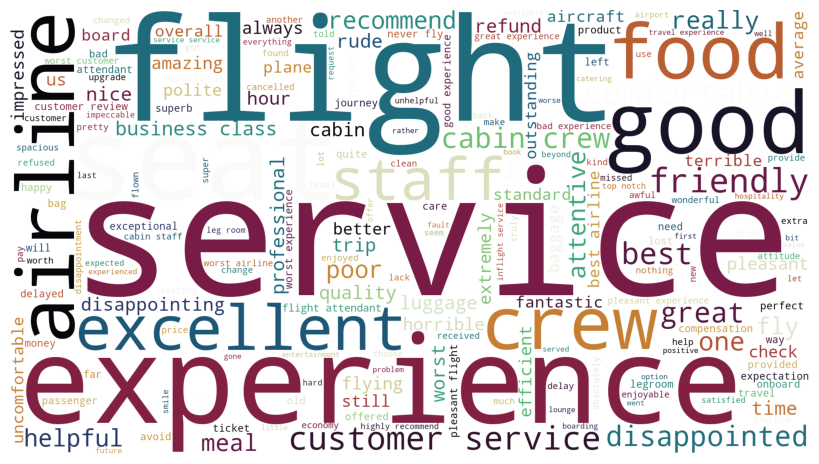

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import cmasher as cmr
import pandas as pd

combo = df[['Title', 'Reviews']].astype(str)
text = ' '.join(df['Title'].astype(str))

# Filter out words with uppercase letters
text_filtered = ' '.join(word for word in text.split() if not any(c.isupper() for c in word))

wordcloud = WordCloud(width=1800, height=1000, colormap=cmr.seasons,background_color='white', min_font_size=10).generate(text_filtered)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [36]:
# df = functions.col_work_dos(df)
# df

,Airline,Month Flown,Year Flown,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,...,Title Polarity,Title Subjectivity,Class_Business Class,Class_Economy Class,Class_First Class,Class_Premium Economy,Type of Traveller_Business,Type of Traveller_Couple Leisure,Type of Traveller_Family Leisure,Type of Traveller_Solo Leisure
0,Singapore Airlines,12,2023,4,4,4,4,4,9,1,...,0.600,0.9,True,False,False,False,False,False,False,True
1,Singapore Airlines,2,2024,5,3,4,4,1,3,0,...,-1.000,1.0,False,True,False,False,False,False,False,True
2,Singapore Airlines,2,2024,1,5,2,1,5,10,1,...,0.000,0.0,False,True,False,False,False,False,True,False
3,Singapore Airlines,2,2024,5,5,5,5,5,10,1,...,0.300,0.3,False,True,False,False,False,False,False,True
4,Singapore Airlines,2,2024,5,5,5,5,5,10,1,...,0.700,0.6,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,Korean Air,6,2016,5,4,5,3,4,7,1,...,0.000,0.0,False,True,False,False,True,False,False,False
8096,Korean Air,6,2016,3,5,5,4,5,10,1,...,0.000,0.0,False,True,False,False,False,True,False,False
8097,Korean Air,4,2016,4,5,5,5,1,2,0,...,0.000,0.0,True,False,False,False,True,False,False,False
8098,Korean Air,4,2016,5,1,3,4,5,10,1,...,0.200,0.1,True,False,False,False,True,False,False,False


In [37]:
# pickle.dump(df, open('df.pkl','wb'))